<a href="https://colab.research.google.com/github/TariqIjaz/data-analysis-python/blob/main/Student_Depression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Depression Data Analysis**
   

### 1. Introduction

**Objective:** This project aims to analyze student depression factors and their correlations to various academic, social, and lifestyle aspects.

**Dataset Overview:**
- **Rows and Columns:** The dataset contains multiple records of students, each with demographic, lifestyle, and academic attributes.
- **Key Variables:** Age, Gender, Academic Pressure, Work Pressure, CGPA, Sleep Duration, Dietary Habits, Financial Stress, Depression, etc.

**Key Questions:**
1. What factors influence student depression?
2. Are there actionable patterns or trends in the data?
3. How can this analysis inform potential interventions?

---

### 2. Data Preparation

**Data Importation:**
The dataset is imported from a CSV file and loaded into a DataFrame for analysis.

**Data Cleaning:**
- Missing values were identified and imputed with appropriate strategies (e.g., median for numerical variables).
- Outliers were handled using boxplots and visualization techniques.

**Feature Engineering:**
- A new "Stress Score" variable was created by combining Academic Pressure, Work Pressure, and Financial Stress to better understand overall stress levels.

---

### 3. Exploratory Data Analysis (EDA)

#### **Demographic Distribution**

- **Age Distribution and Depression**:
  - Students aged **20-25** are the most prone to depression, accounting for the largest group of affected individuals. This may indicate challenges related to early adulthood stress, academic pressures, and career uncertainties.
  - Older students (above **30**) show lower depression rates, suggesting better coping mechanisms or stability in personal and professional life.
  
- **Gender and Depression**:
  - Female students have a **slightly higher incidence of depression** compared to male students, but the difference is not very significant.
  - This could point toward societal or academic stressors impacting female students differently.

---

#### **Academic Factors**

- **Academic Pressure and Depression**:
  - Students reporting **high academic pressure** consistently exhibit higher depression rates.
  - Specifically, those scoring **4 and above** on the academic pressure scale are the most vulnerable.
  
- **Study Satisfaction and Depression**:
  - Students with **low study satisfaction** (scores of 1-2) are far more likely to experience depression.
  - Conversely, higher satisfaction (scores of 4-5) correlates with lower depression levels, emphasizing the importance of enjoying academic activities.

---

#### **Lifestyle Factors**

- **Sleep Duration and Depression**:
  - Students who sleep **less than 5 hours** per night have significantly higher depression rates. Sleep deprivation appears to be one of the most prominent contributors to depression.
  - Students with **7-8 hours of sleep** show the lowest levels of depression, indicating the importance of healthy sleep habits.

- **Financial Stress and Depression**:
  - Financial stress has a strong positive correlation with depression. Students experiencing **high financial stress** (scores 4-5) are disproportionately affected.
  - Financial stability programs or scholarships could help alleviate this burden and reduce depression rates.

---

### 4. Statistical Analysis

**Chi-Square Tests:**
- A chi-square test between Gender and Depression showed no statistically significant relationship.
- A chi-square test between Family History of Mental Illness and Depression indicated a significant relationship, emphasizing the importance of psychological support for such students.

---

### 5. Predictive Modeling

**Random Forest Classifier:**
- **Model Performance:**
  - Accuracy: The model demonstrated high accuracy, suggesting it can reliably predict depression risk.
  - **Key Predictors:** Financial Stress, Academic Pressure, Sleep Duration.

**Evaluation Metrics:**
- Classification report with precision(85%), recall(87%), and F1-score.
- ROC Curve was plotted, showing strong model performance of 0.91.

**Key Insight:**
- Financial stress, academic pressure, and lack of sleep are the most influential factors contributing to depression, as identified by the model.

---

### 6. Clustering Analysis

**K-Means Clustering:**
- The data was grouped into three clusters based on stress-related factors:

  - Cluster 2 (Yellow): Students in this cluster appear to have the highest stress levels, specifically from academic and financial pressure. This group likely experiences the highest levels of depression.
  
  - Cluster 1 (Teal): This cluster shows healthier patterns, with better study/job satisfaction and less financial burden.
  
  - Cluster 0 (Purple): This group has moderate stress but lower satisfaction, which could indicate dissatisfaction or lack of fulfillment despite manageable workloads.

---

### 7. Key Insights and Recommendations

#### **Insights:**
1. Younger students (20-25 age group) show higher depression rates.
2. High academic pressure, financial stress, and lack of sleep are major contributors.
3. Students with a family history of mental illness are more prone to depression.
4. Lifestyle factors like poor dietary habits correlate with higher depression levels.

#### **Recommendations:**

1. Targeted Financial Assistance Programs: Prioritize financial aid or scholarships for students experiencing high financial stress (scores 4-5), as this group has a strong correlation with depression.

2. Sleep Hygiene Programs: Implement workshops or awareness programs emphasizing the importance of adequate sleep (7-8 hours), particularly for students sleeping less than 5 hours.

3. Academic Pressure Management: Introduce time management training, study groups, and flexible deadlines for students reporting high academic pressure (scores 4+).

4. Personalized Support for Cluster 2: Identify students from Cluster 2 (high academic and financial stress) for targeted mental health counseling and intervention programs.

5. Counseling for Low Satisfaction Students: Offer academic and career counseling for students with low study/job satisfaction (scores 1-2) to improve fulfillment and reduce dissatisfaction-related stress.

6. Early Identification via Predictive Model: Use the trained Random Forest model to regularly screen and identify at-risk students based on financial stress, academic pressure, and sleep duration for early intervention.


---

### 8. Conclusion

This analysis provides actionable insights into the factors influencing student depression. By implementing the recommendations, stakeholders can proactively address the issue, reduce depression rates, and enhance student well-being.



#**Data Analysis:**

##2) Data Preparation

###2.1) Importing Basic Libraries


In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 11
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



In [7]:
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


###2.1) Loading Dataset


In [2]:
!pip install --upgrade kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.4
    Uninstalling kagglehub-0.3.4:
      Successfully uninstalled kagglehub-0.3.4


In [10]:
import os

folder_path = '/root/.cache/kagglehub/datasets/hopesb/student-depression-dataset/versions/1'
print("Files in directory:", os.listdir(folder_path))


Files in directory: ['Student Depression Dataset.csv']


In [17]:
file_path = '/root/.cache/kagglehub/datasets/hopesb/student-depression-dataset/versions/1/Student Depression Dataset.csv'
df = pd.read_csv(file_path)
print(df.head())


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [16]:
df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


###2.3) Initial Analysis on Dataset

In [ ]:
df.shape

(27901, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


###2.3.1) Analysis Output

* The Dataset comprises of 973 rows and 15 columns

* There are 0 missing values for all columns

* The type of variables in the dataset are both categorical and numerical format (Object, Integer and Float)

## 3. Preparation for Exploratory Data Analysis(EDA)

### 3.1 Examining unique values and data split

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
id,27901
Gender,2
Age,34
City,52
Profession,14
Academic Pressure,6
Work Pressure,3
CGPA,332
Study Satisfaction,6
Job Satisfaction,5


In [ ]:
# List numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# List categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Count the columns
num_cols_count = len(numerical_columns)
cat_cols_count = len(categorical_columns)

# Print results
print(f"Numerical columns ({num_cols_count}): {numerical_columns}")
print(f"Categorical columns ({cat_cols_count}): {categorical_columns}")



Numerical columns (10): ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
Categorical columns (8): ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


###3.3 Data Cleaning and Preprocessing


In [ ]:
 if 'financial stress' in df.columns:
        df = df.dropna(subset=['financial stress'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.columns)


Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work/study_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression'],
      dtype='object')

In [ ]:
df['sleep_duration']

,sleep_duration
0,5-6 hours
1,5-6 hours
2,Less than 5 hours
3,7-8 hours
4,5-6 hours
...,...
27896,5-6 hours
27897,Less than 5 hours
27898,5-6 hours
27899,Less than 5 hours


###3.3.1) Analysis Output

* There are 10 numerical columns and 8 categorical ones.

* There are 3 missing values for the 'financial stress' column, since it's only 3 values, we will drop the 3 rows.

* There are no duplicate entries for all columns


## 4. Exploratory Data Analysis


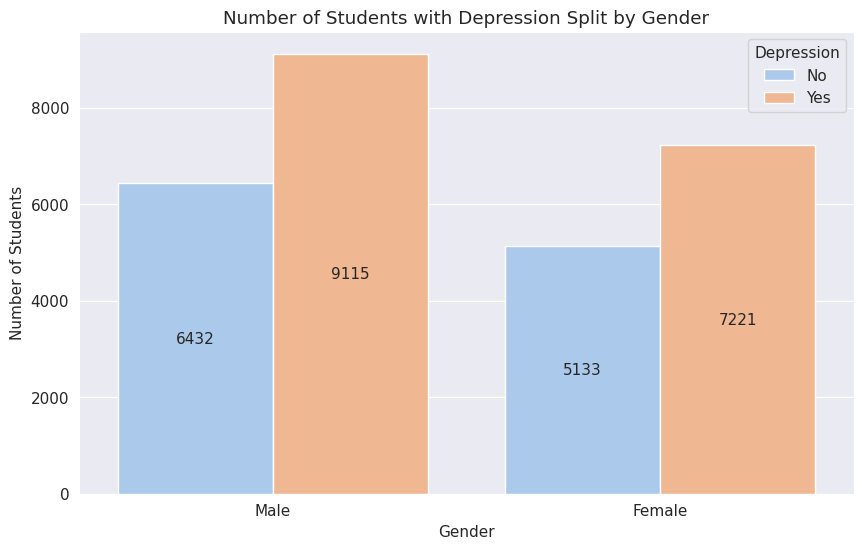

In [ ]:
# Chart 1: Depression Split by Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='gender', hue='depression', palette='pastel')

# Add the count numbers in the middle of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title("Number of Students with Depression Split by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.legend(title="Depression", labels=["No", "Yes"])
plt.show()


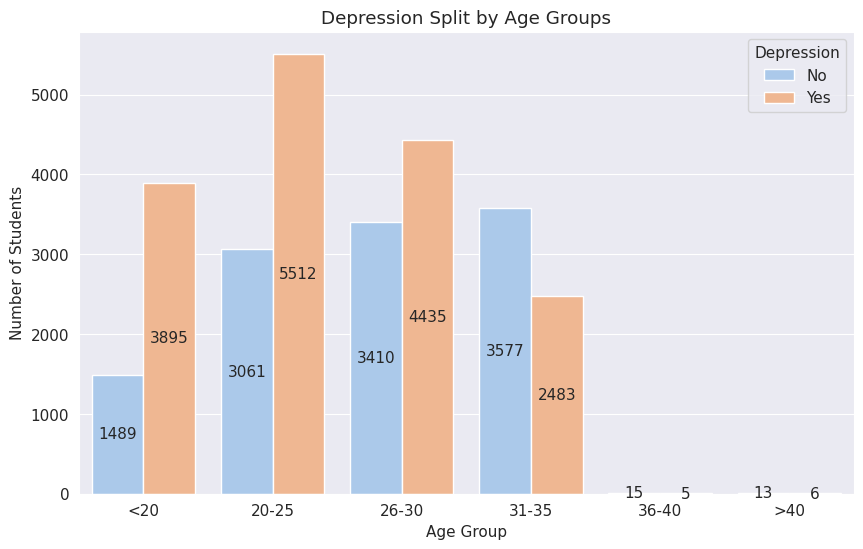

In [ ]:
# Chart 2: Depression Split by Age Groups
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 25, 30, 35, 40, 100],
                         labels=["<20", "20-25", "26-30", "31-35", "36-40", ">40"])
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='age_group', hue='depression', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Depression Split by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Students")
plt.legend(title="Depression", labels=["No", "Yes"])
plt.show()

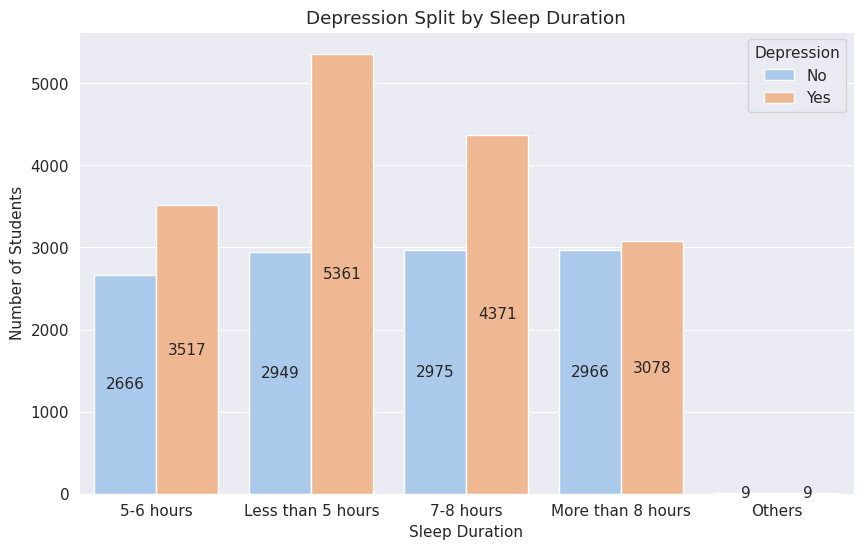

In [ ]:
# Chart 3: Depression Split by Sleep Duration
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='sleep_duration', hue='depression', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Depression Split by Sleep Duration")
plt.xlabel("Sleep Duration")
plt.ylabel("Number of Students")
plt.legend(title="Depression", labels=["No", "Yes"])
plt.show()

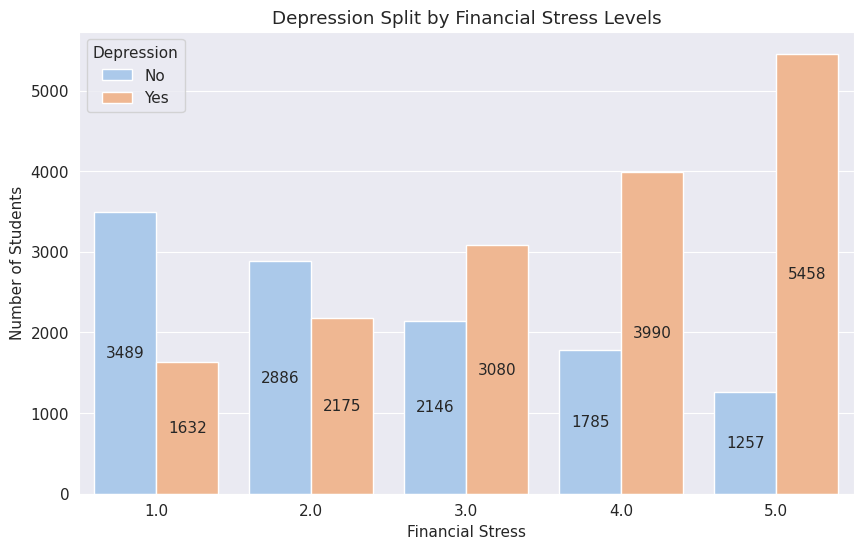

In [ ]:
# Chart 4: Depression Split by Financial Stress Levels
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='financial_stress', hue='depression', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Depression Split by Financial Stress Levels")
plt.xlabel("Financial Stress")
plt.ylabel("Number of Students")
plt.legend(title="Depression", labels=["No", "Yes"])
plt.show()

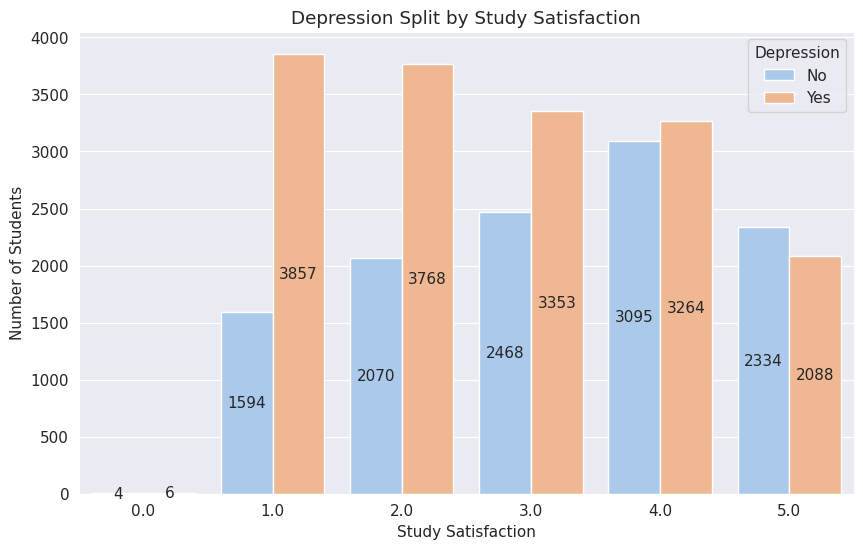

In [ ]:
# Chart 5: Depression Split by Study Satisfaction
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='study_satisfaction', hue='depression', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Depression Split by Study Satisfaction")
plt.xlabel("Study Satisfaction")
plt.ylabel("Number of Students")
plt.legend(title="Depression", labels=["No", "Yes"])
plt.show()

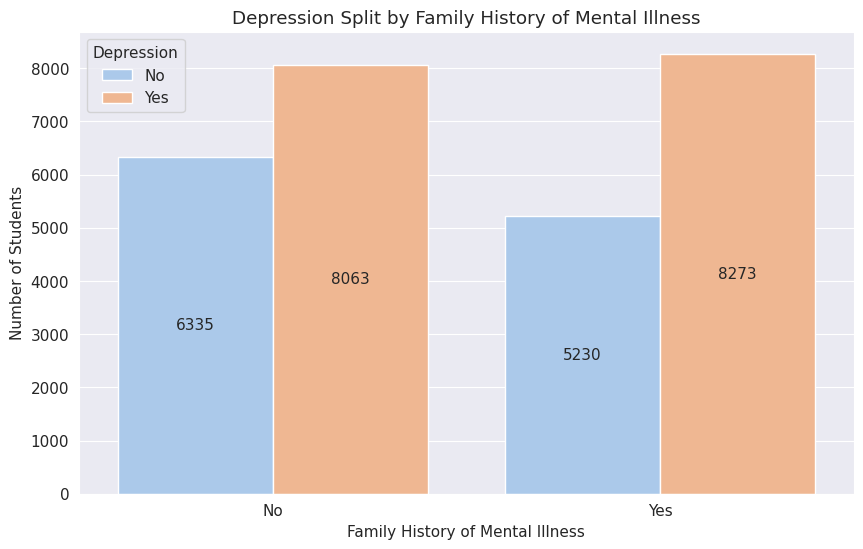

In [ ]:
# Chart 6: Depression Split by Family History of Mental Illness
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='family_history_of_mental_illness', hue='depression', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Depression Split by Family History of Mental Illness")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Number of Students")
plt.legend(title="Depression", labels=["No", "Yes"])
plt.show()

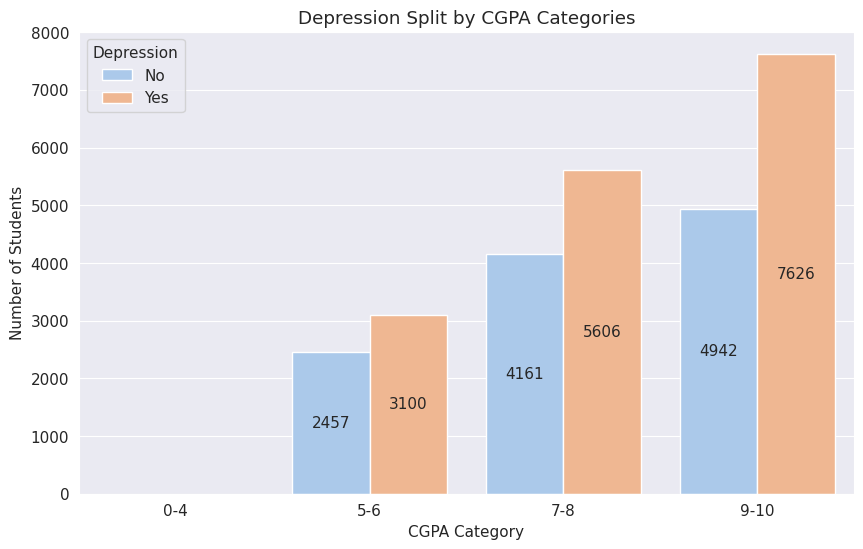

In [ ]:
# Chart 7: Depression Split by CGPA Categories
df['cgpa_category'] = pd.cut(df['cgpa'], bins=[0, 4, 6, 8, 10],
                             labels=["0-4", "5-6", "7-8", "9-10"])
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='cgpa_category', hue='depression', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Depression Split by CGPA Categories")
plt.xlabel("CGPA Category")
plt.ylabel("Number of Students")
plt.legend(title="Depression", labels=["No", "Yes"])
plt.show()

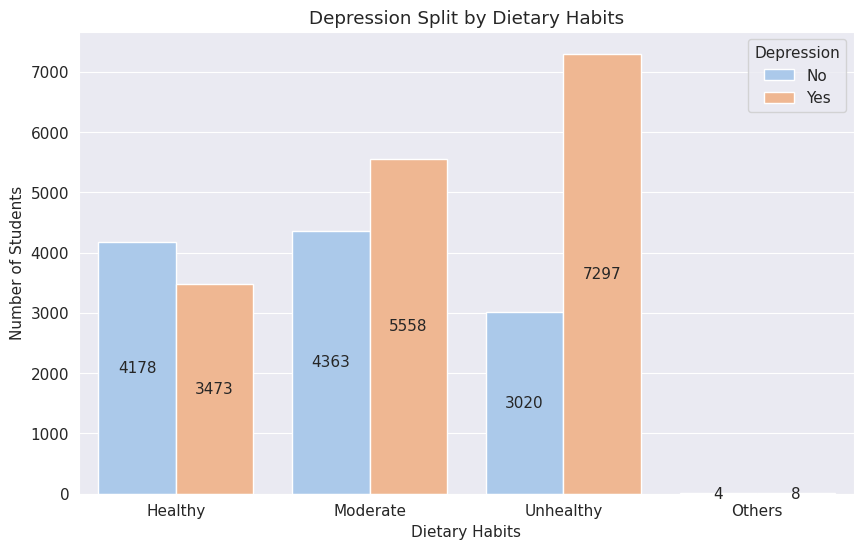

In [ ]:
# Chart 8: Depression Split by Dietary Habits
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='dietary_habits', hue='depression', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Depression Split by Dietary Habits")
plt.xlabel("Dietary Habits")
plt.ylabel("Number of Students")
plt.legend(title="Depression", labels=["No", "Yes"])
plt.show()

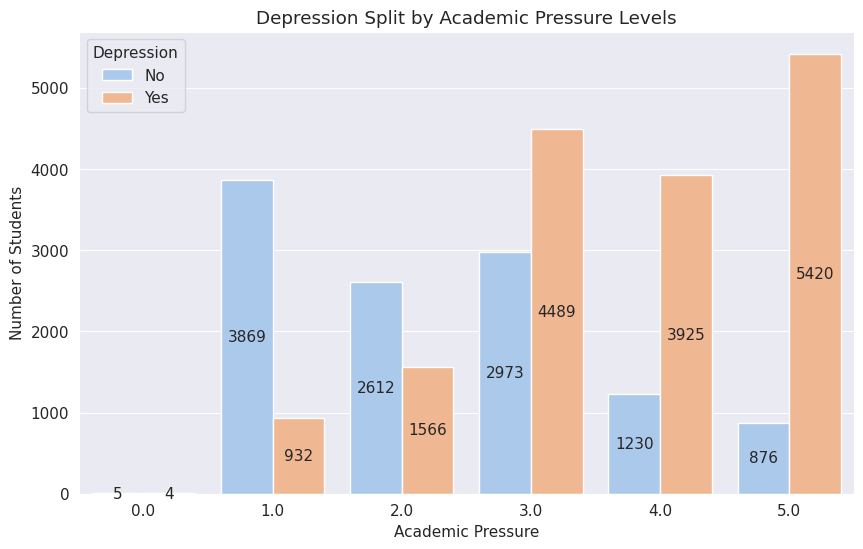

In [ ]:
# Chart 9: Depression Split by Academic Pressure Levels
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='academic_pressure', hue='depression', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Depression Split by Academic Pressure Levels")
plt.xlabel("Academic Pressure")
plt.ylabel("Number of Students")
plt.legend(title="Depression", labels=["No", "Yes"])
plt.show()

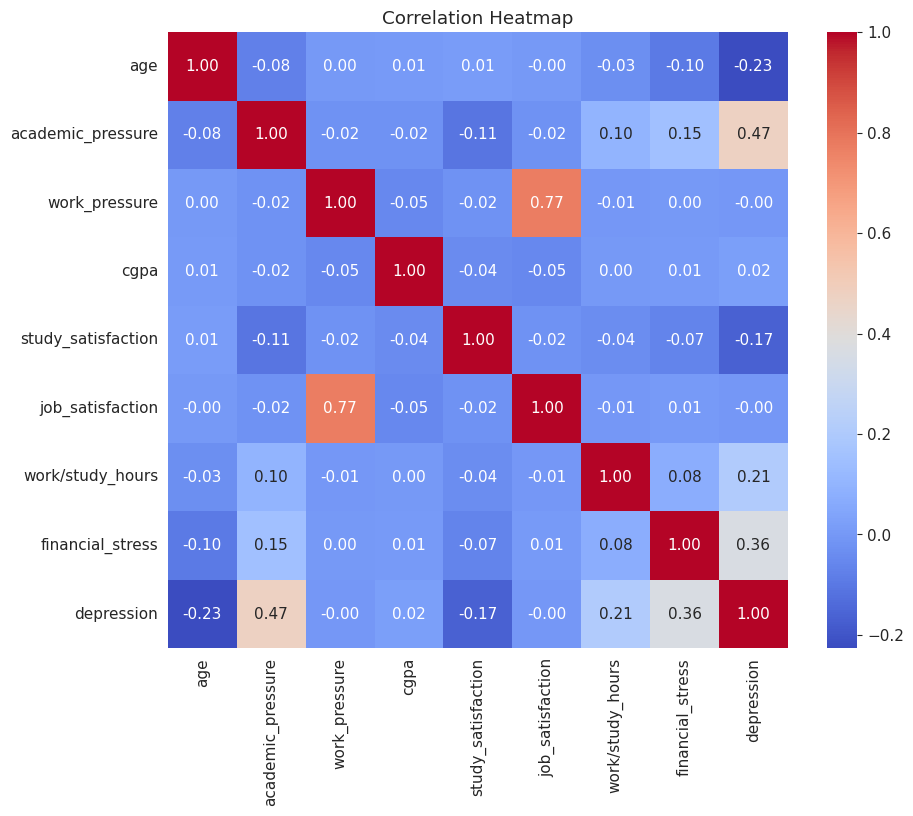

In [ ]:
# Chart 10: Correlation heatmap for numerical features
numerical_columns = ['age', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction',
                     'job_satisfaction', 'work/study_hours', 'financial_stress']

correlation_matrix = df[numerical_columns + ['depression']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## 5 Predictive Analysis


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3505
           1       0.85      0.87      0.86      4866

    accuracy                           0.83      8371
   macro avg       0.83      0.83      0.83      8371
weighted avg       0.83      0.83      0.83      8371


ROC-AUC Score: 0.9101197396942774


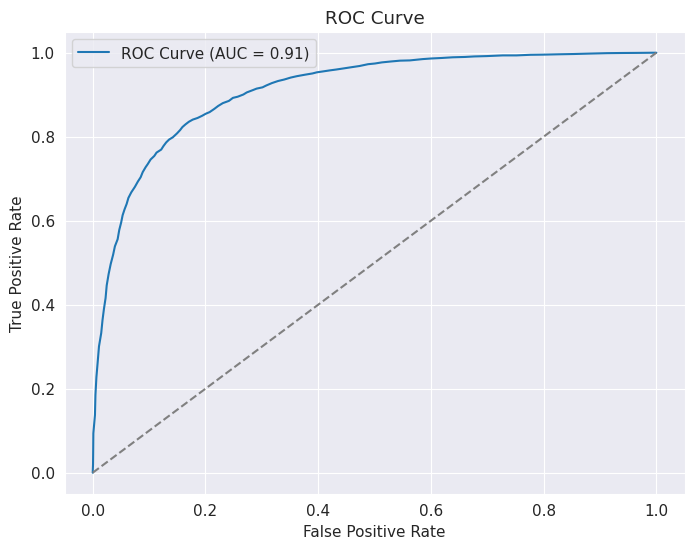

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# Prepare data for predictive modeling
X = df.drop(['id', 'city', 'depression'], axis=1)  # Drop non-predictive and target columns
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables
y = df['depression']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Missing values found. Filling with median.


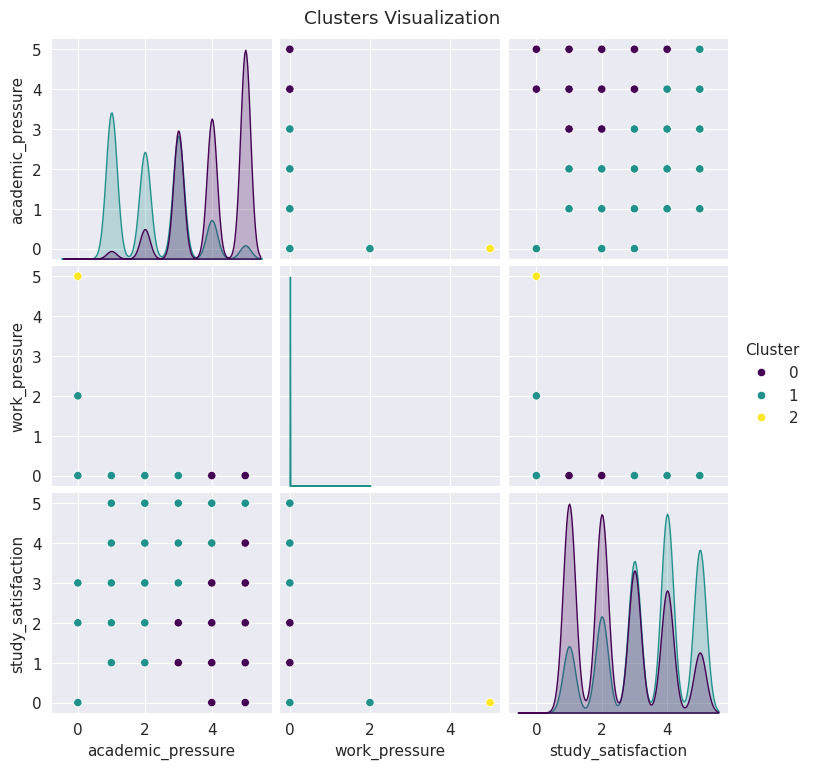

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
clustering_features = ['academic_pressure', 'work_pressure', 'study_satisfaction', 'job_satisfaction',
                       'work/study_hours', 'financial_stress']

# Check for missing values and handle them
if df[clustering_features].isnull().sum().sum() > 0:
    print("Missing values found. Filling with median.")
    df[clustering_features] = df[clustering_features].fillna(df[clustering_features].median())

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[clustering_features])

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the dataset
df['Cluster'] = clusters

# Visualizing Clusters
sns.pairplot(df, vars=clustering_features[:3], hue='Cluster', palette='viridis')
plt.suptitle('Clusters Visualization', y=1.02)
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Example: Chi-square test for Gender and Depression
gender_depression_table = pd.crosstab(df['gender'], df['depression'])
chi2, p, dof, expected = chi2_contingency(gender_depression_table)

print("Chi-Square Test for Gender and Depression")
print(f"Chi2: {chi2:.2f}, P-value: {p:.4f}, Degrees of Freedom: {dof}")
if p < 0.05:
    print("Result: Statistically significant relationship")
else:
    print("Result: No statistically significant relationship")


Chi-Square Test for Gender and Depression
Chi2: 0.08, P-value: 0.7737, Degrees of Freedom: 1
Result: No statistically significant relationship


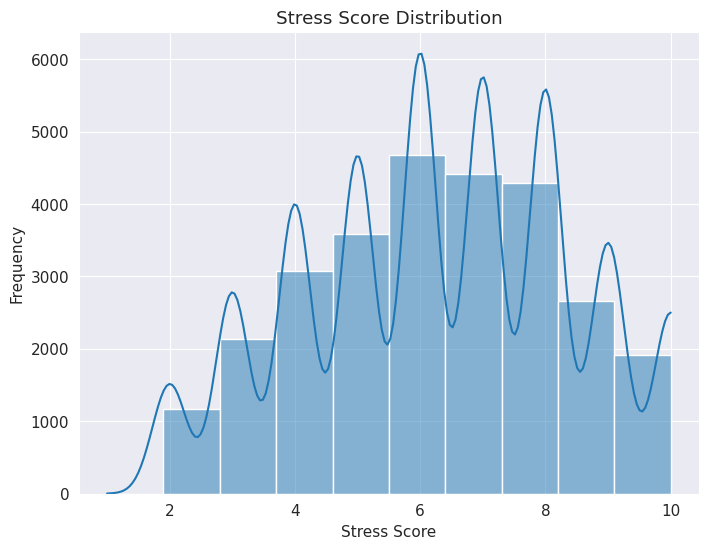

In [ ]:
# Creating a Stress Score by combining related columns
df['stress_score'] = (df['academic_pressure'] +
                      df['work_pressure'] +
                      df['financial_stress'])

# Visualize Stress Score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['stress_score'], bins=10, kde=True)
plt.title('Stress Score Distribution')
plt.xlabel('Stress Score')
plt.ylabel('Frequency')
plt.show()
